<a href="https://colab.research.google.com/github/angelamejia804/TimeSeries/blob/main/Analisis_TimeSeries_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import numpy as np
import pandas as pd
import pylab as pl
import warnings
import itertools
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from matplotlib.colors import Normalize
from time import time
import os
import datetime
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()


mpl.rcParams['figure.figsize'] = (11, 4)
mpl.rcParams['axes.grid'] = False

import statsmodels.api as sm

plt.style.use('fivethirtyeight')

In [71]:
from google.colab import files
uploaded = files.upload()

Saving data_DGMB (3).csv to data_DGMB (3) (2).csv


In [72]:
df = pd.read_csv("data_DGMB (3).csv", delimiter=';')

Cargar en un Dataframe

In [73]:
df.head(5)

,Sede,Date,YYYYWWMarketing,Total DegreeDay
0,MB,29/12/2019,202001,NaN
1,MB,30/12/2019,202001,NaN
2,MB,31/12/2019,202001,NaN
3,MB,1/01/2020,202001,"9,83"
4,MB,2/01/2020,202001,"9,87"


Darle formato de fecha a la columna de fecha

---



In [74]:
df['Date']=pd.to_datetime(df['Date'])

<ipython-input-74-182e23b44254>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date']=pd.to_datetime(df['Date'])


dejamos las columnas que nos interes analizar

In [75]:
list(df)

['Sede', 'Date', 'YYYYWWMarketing', 'Total DegreeDay']

Muestreo de los datos de forma descriptiva





In [76]:
df.describe(include='all')
#se debe ajustar el tipo de dato de los grados dia

<ipython-input-76-22fe72198301>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,Sede,Date,YYYYWWMarketing,Total DegreeDay
count,1171,1171,1171.000000,1159
unique,1,1171,NaN,389
top,MB,2019-12-29 00:00:00,NaN,"10,57"
freq,1171,1,NaN,10
first,NaN,2019-12-29 00:00:00,NaN,NaN
last,NaN,2023-12-03 00:00:00,NaN,NaN
mean,NaN,NaN,202137.076003,NaN
std,NaN,NaN,91.260584,NaN
min,NaN,NaN,202001.000000,NaN
25%,NaN,NaN,202042.000000,NaN


In [77]:
df['Total DegreeDay'].dtype

dtype('O')

In [78]:
df['Total DegreeDay'] = df['Total DegreeDay'].str.replace(',', '.').astype(float)

In [79]:
df['Total DegreeDay'] = pd.to_numeric(df['Total DegreeDay'])

In [80]:
df['YYYYWWMarketing'] = df['YYYYWWMarketing'].apply(str)

hago un nuevo df para las columnas de interes

---



---



In [81]:
df_gd=df[['Total DegreeDay','Date','YYYYWWMarketing']]

In [82]:
df_gd = df_gd.set_index('Date') 

In [83]:
df_gd.dtypes

Total DegreeDay    float64
YYYYWWMarketing     object
dtype: object

In [84]:
df_gd.describe(include='all')

,Total DegreeDay,YYYYWWMarketing
count,1159.000000,1171
unique,NaN,168
top,NaN,202001
freq,NaN,7
mean,9.628154,NaN
std,0.963549,NaN
min,7.040000,NaN
25%,8.995000,NaN
50%,9.650000,NaN
75%,10.270000,NaN


Se hace una validación preliminar de datos faltantes

---



---



In [85]:
df_gd.isnull().sum()

Total DegreeDay    12
YYYYWWMarketing     0
dtype: int64

Encontramos que para Grados dia, se tiene registros sin valor de temperatura (grados día) (9 fechas sin valor registrado)

In [86]:
df_gd

,Total DegreeDay,YYYYWWMarketing
Date,,
2019-12-29,NaN,202001
2019-12-30,NaN,202001
2019-12-31,NaN,202001
2020-01-01,9.83,202001
2020-02-01,9.87,202001
...,...,...
2023-09-03,9.20,202310
2023-10-03,10.41,202310
2023-11-03,8.75,202310


In [87]:
df_gd=df.groupby('Date').sum() # en caso de tener mas de un valor de temperatura x fecha las suma

<ipython-input-87-4602025f0bb1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_gd=df.groupby('Date').sum() # en caso de tener mas de un valor de temperatura x fecha las suma


In [88]:
df_gd.isnull().sum()

Total DegreeDay    0
dtype: int64

A partir de la creación de un nuevo DF donde tenemos las temperaturas registradas o Grados día por fecha, se hace el analisis de los datos en el tiempo (series de tiempo)

In [89]:
df_gd

,Total DegreeDay
Date,
2019-12-29,0.00
2019-12-30,0.00
2019-12-31,0.00
2020-01-01,9.83
2020-01-02,8.08
...,...
2023-11-02,11.08
2023-11-03,8.75
2023-12-01,9.65


Variabilidad de los grados dias

In [ ]:
df_gd_var=df_gd[['Total DegreeDay']]

In [ ]:
df_gd_var=df_gd_var.diff()

In [ ]:
df_gd_var.describe(include='all')

,Total DegreeDay
count,1170.000000
mean,0.008197
std,1.660601
min,-10.940000
25%,-0.790000
50%,0.010000
75%,0.720000
max,10.340000


In [ ]:
df_gd_var

,Total DegreeDay
Date,
2019-12-29,NaN
2019-12-30,0.00
2019-12-31,0.00
2020-01-01,9.83
2020-01-02,-1.75
...,...
2023-11-02,0.62
2023-11-03,-2.33
2023-12-01,0.90


<ipython-input-26-064860d46e65>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(df_gd_var['2020'].values)


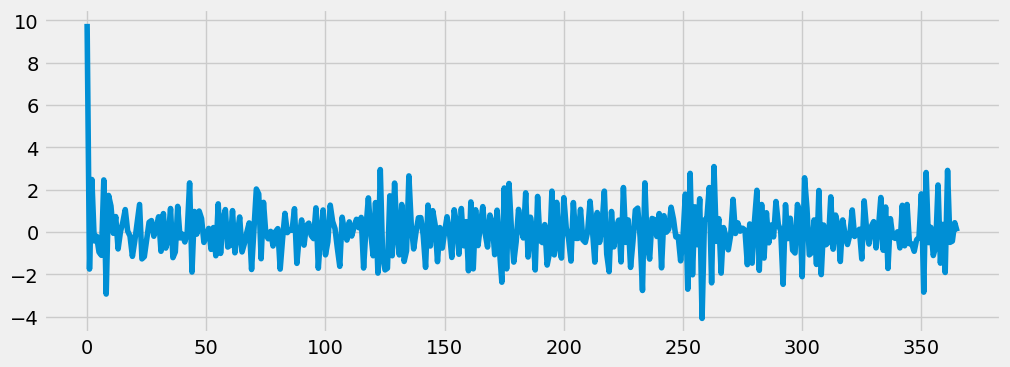

In [ ]:
plt.plot(df_gd_var['2020'].values)


<ipython-input-27-76c4d03a2ae2>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(df_gd_var['2021'].values)


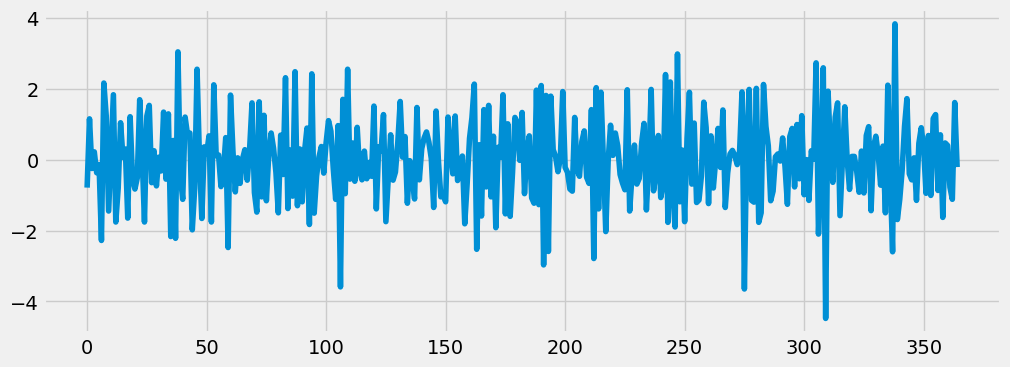

In [ ]:
plt.plot(df_gd_var['2021'].values)


<ipython-input-28-cbec58cf2640>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(df_gd_var['2022'].values)


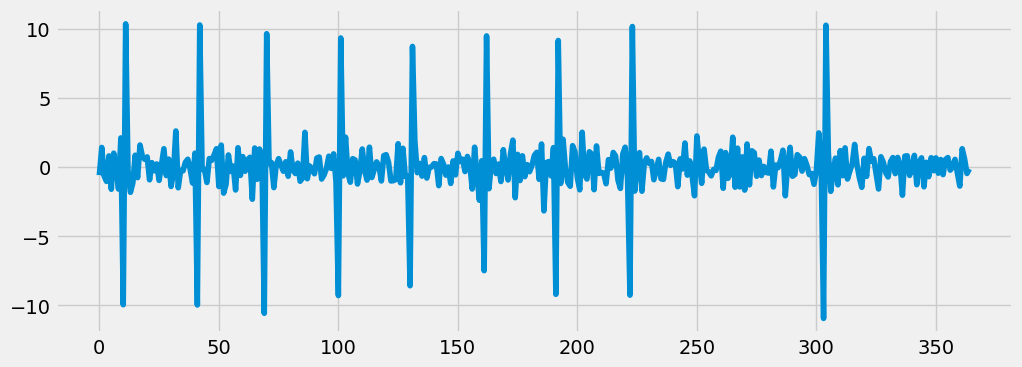

In [ ]:

plt.plot(df_gd_var['2022'].values)


<ipython-input-29-0074e1dc108e>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(df_gd_var['2023'].values)


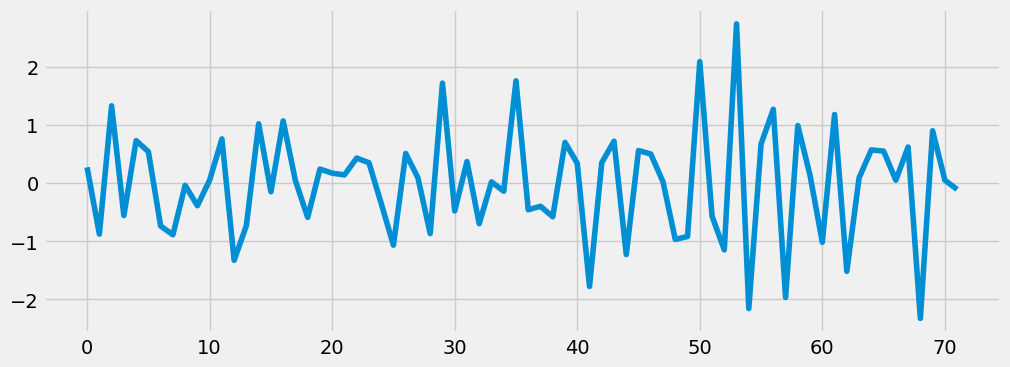

In [ ]:

plt.plot(df_gd_var['2023'].values)

usamos la funcion resample para realiar analisis en diferentes intervalos (W)= semana

In [ ]:
df_gd.resample('W').sum()

,Total DegreeDay
Date,
2019-12-29,0.00
2020-01-05,48.55
2020-01-12,64.50
2020-01-19,77.62
2020-01-26,72.02
...,...
2023-11-05,30.29
2023-11-12,0.00
2023-11-19,0.00


In [ ]:
df_gd.resample('7D').sum() #CADA 7 DIAS

,Total DegreeDay
Date,
2019-12-29,38.61
2020-01-05,64.12
2020-01-12,76.28
2020-01-19,74.62
2020-01-26,69.21
...,...
2023-11-05,0.00
2023-11-12,0.00
2023-11-19,0.00


In [ ]:
df_gd.resample('M').sum() #SUMA DE GRADOS DÍAS ACUMULADO MES

,Total DegreeDay
Date,
2019-12-31,0.00
2020-01-31,312.97
2020-02-29,299.35
2020-03-31,322.69
2020-04-30,289.55
2020-05-31,311.89
2020-06-30,290.35
2020-07-31,297.45
2020-08-31,300.40


In [ ]:
sr=df_gd.groupby(pd.Grouper(freq='w'))['Total DegreeDay'].sum()

<Axes: xlabel='Date'>

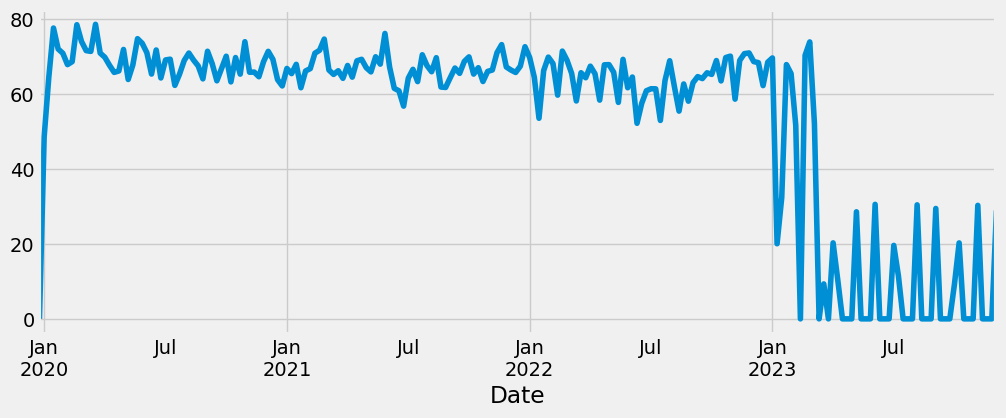

In [ ]:
sr.plot()

<Axes: xlabel='Date'>

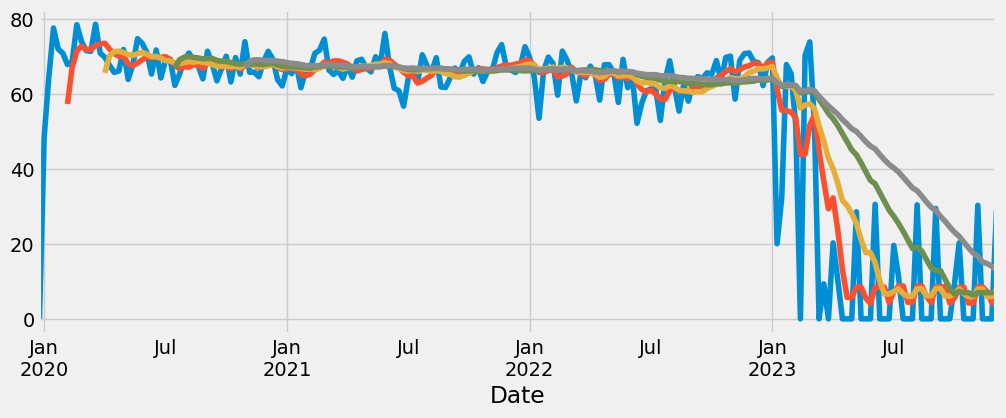

In [ ]:
#probamos diferentes ventanas para la suma de grados día
sr.plot()
sr.rolling(window=7).mean().plot()
sr.rolling(window=15).mean().plot()
sr.rolling(window=30).mean().plot()
sr.rolling(window=45).mean().plot()

In [ ]:
#probamos una serie de tiempo x semana con el promedio
sr_m=df_gd.groupby(pd.Grouper(freq='w'))['Total DegreeDay'].mean()

<Axes: xlabel='Date'>

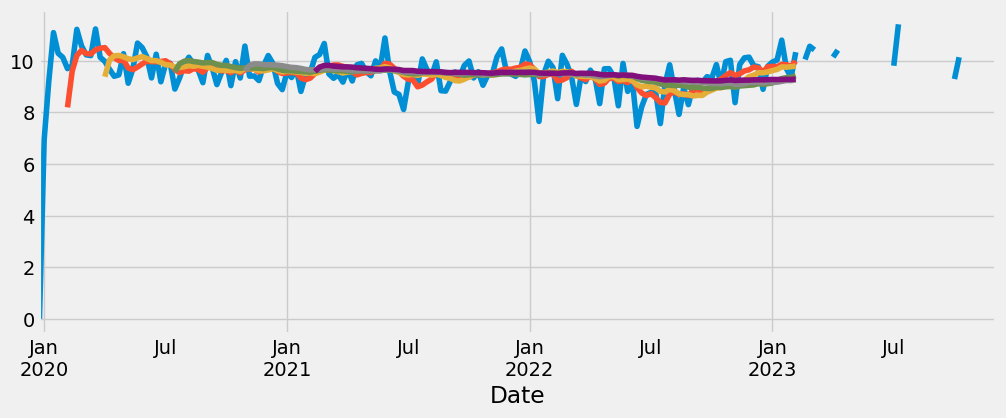

In [ ]:
#probamos diferentes ventanas para la suma de grados día
sr_m.plot()
sr_m.rolling(window=7).mean().plot()
sr_m.rolling(window=15).mean().plot()
sr_m.rolling(window=30).mean().plot()
sr_m.rolling(window=45).mean().plot()
sr_m.rolling(window=60).mean().plot()

<Axes: xlabel='Date'>

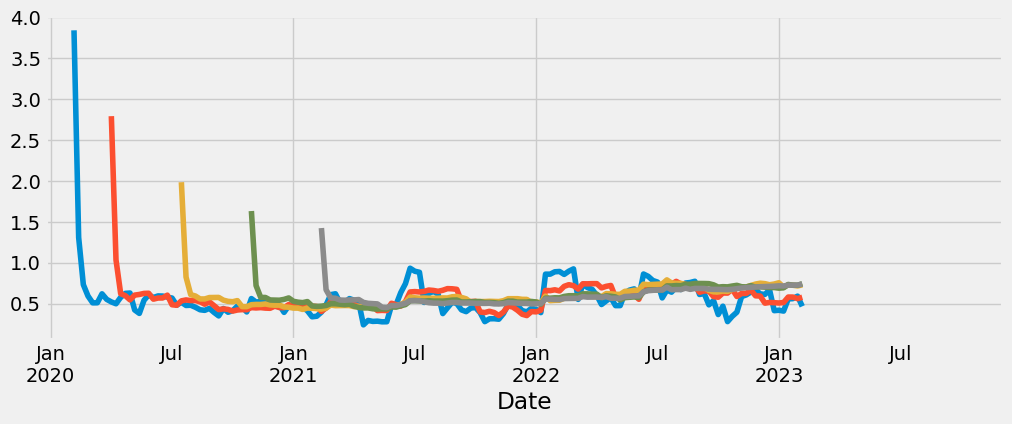

In [ ]:
sr_m.rolling(window=7).std().plot()
sr_m.rolling(window=15).std().plot()
sr_m.rolling(window=30).std().plot()
sr_m.rolling(window=45).std().plot()
sr_m.rolling(window=60).std().plot()

<Axes: xlabel='Date'>

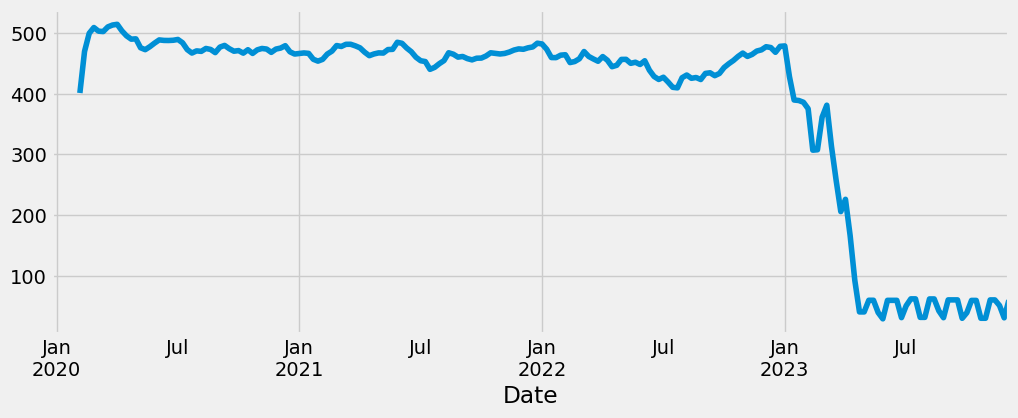

In [ ]:
sr.rolling(window=7).sum().plot()

<Axes: xlabel='Date'>

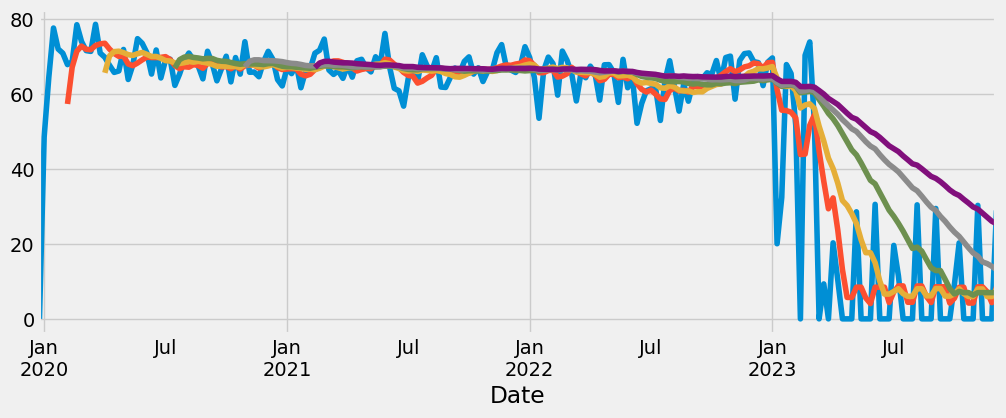

In [ ]:
sr.plot()
sr.rolling(window=7).mean().plot()
sr.rolling(window=15).mean().plot()
sr.rolling(window=30).mean().plot()
sr.rolling(window=45).mean().plot()
sr.rolling(window=60).mean().plot()

In [ ]:
Semanas_m=df_gd[['Total DegreeDay']].resample('m').mean() 


<ipython-input-42-fd0f03b906b5>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(Semanas_m['2021'].values)
<ipython-input-42-fd0f03b906b5>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(Semanas_m['2022'].values)


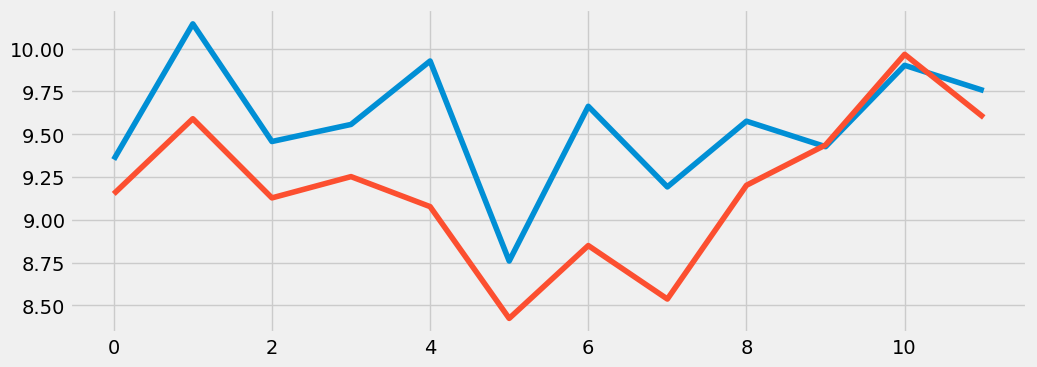

In [ ]:
plt.plot(Semanas_m['2021'].values)
plt.plot(Semanas_m['2022'].values)

<ipython-input-43-5706ec6d285a>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(Semanas_m['2021'].values)


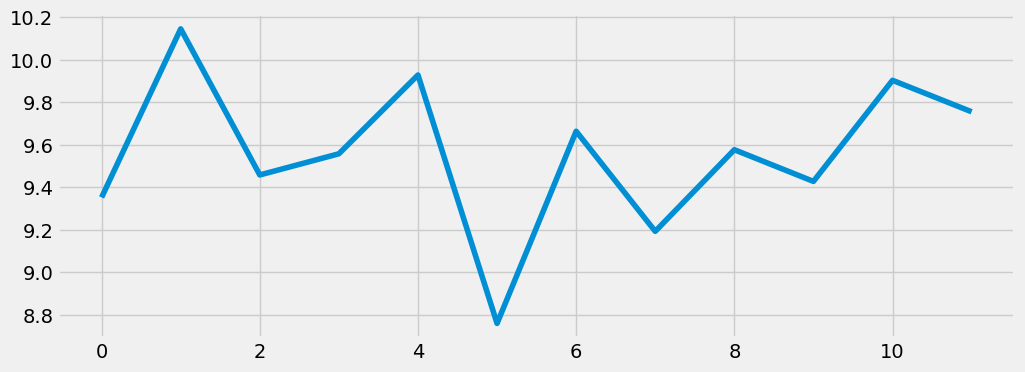

In [ ]:
plt.plot(Semanas_m['2021'].values)


<ipython-input-44-7be66c288bb8>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(Semanas_m['2022'].values)


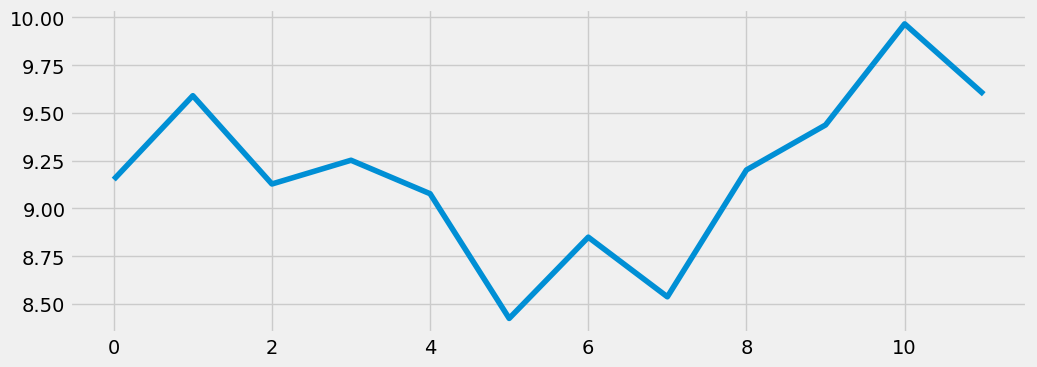

In [ ]:
plt.plot(Semanas_m['2022'].values)

<ipython-input-45-fd0f03b906b5>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(Semanas_m['2021'].values)
<ipython-input-45-fd0f03b906b5>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(Semanas_m['2022'].values)


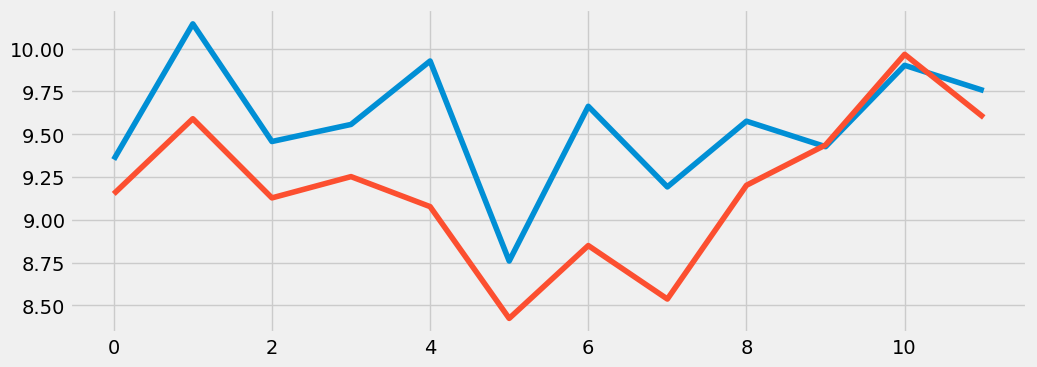

In [ ]:
plt.plot(Semanas_m['2021'].values)
plt.plot(Semanas_m['2022'].values)

In [ ]:
Semanas_s=df_gd[['Total DegreeDay']].resample('M').sum() 

<ipython-input-47-ab176d6c430d>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(Semanas_s['2020'].values)
<ipython-input-47-ab176d6c430d>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(Semanas_s['2021'].values)
<ipython-input-47-ab176d6c430d>:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(Semanas_s['2022'].values)


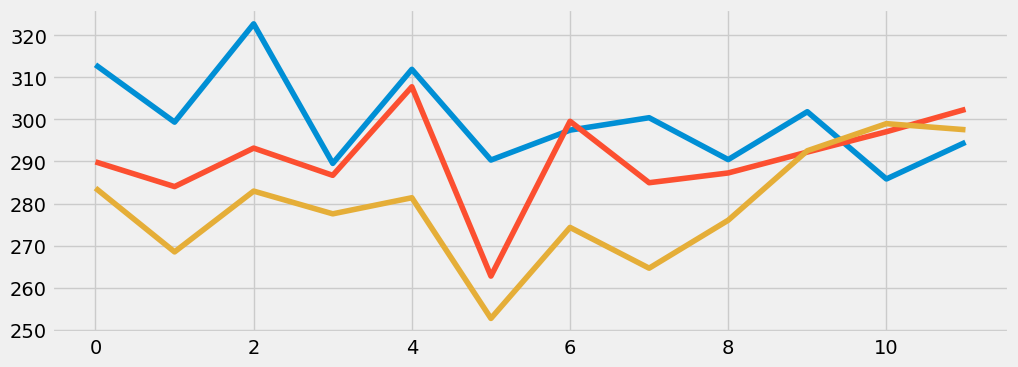

In [ ]:
plt.plot(Semanas_s['2020'].values)
plt.plot(Semanas_s['2021'].values)
plt.plot(Semanas_s['2022'].values)

<ipython-input-48-316200b3fc24>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(Semanas_s['2023'].values)


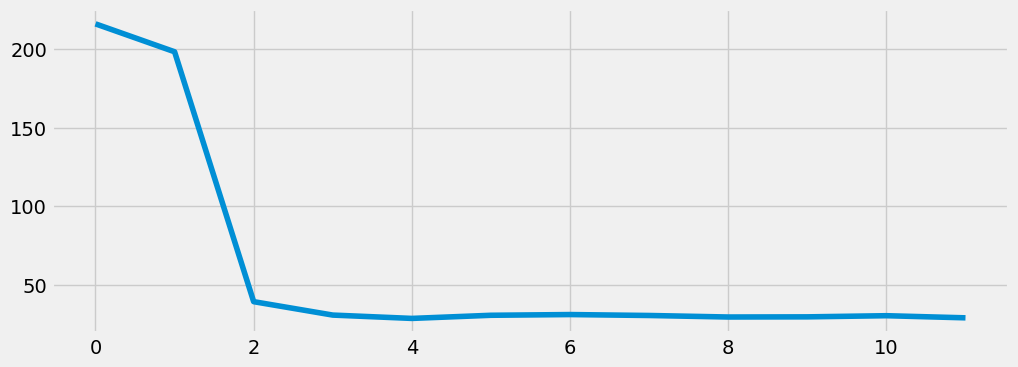

In [ ]:
plt.plot(Semanas_s['2023'].values)

Ver notebook

Preparacion_TimeSeries_2_.ipynb

BASE DE DATOS DE PROGRAMACIONES (CORT DE FLOR)

In [ ]:
'''from google.colab import files
uploaded = files.upload()'''

'from google.colab import files\nuploaded = files.upload()'

In [ ]:
'''df_programacion_real = pd.read_csv("Programacion real (2).txt" , delimiter='//') '''

<ipython-input-36-a5ae3b23493d>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_programacion_real = pd.read_csv("Programacion real (2).txt" , delimiter='//')


In [ ]:
'''df_programacion_real.head(10)'''

'df_programacion_real.head(10)'

In [ ]:
'''df_programacion_real.describe(include='all')'''

"df_programacion_real.describe(include='all')"

In [ ]:
'''df_programacion_real['YYYYWWMarketing'] = df_programacion_real['YYYYWWMarketing'].astype(str)'''

In [ ]:
'''df_programacion_real['YYYYWWMarketing'] = df_programacion_real['YYYYWWMarketing'].str.replace('0.', '').astype(str)'''

"df_programacion_real['YYYYWWMarketing'] = df_programacion_real['YYYYWWMarketing'].str.replace('0.', '').astype(str)"

In [ ]:
'''df_programacion_real.head(10)'''

'df_programacion_real.head(10)'

In [ ]:
'''df_programacion_real=df_programacion_real.set_index('YYYYWWMarketing')'''

"df_programacion_real=df_programacion_real.set_index('YYYYWWMarketing')"

In [ ]:
'''df_programacion_real['YYYYWWMarketing'].dtype'''

"df_programacion_real['YYYYWWMarketing'].dtype"

In [ ]:
'''df_programacion_real=df_programacion_real.loc['202101':'202253'] #desde el df original para el rango de tiempo seleccionado'''

"df_programacion_real=df_programacion_real.loc['202101':'202253'] #desde el df original para el rango de tiempo seleccionado"

In [ ]:
'''df_programacion_real.head(10)'''

'df_programacion_real.head(10)'

BASE DE DATOS DE RECEPCIÓN

Ver notebook Recepcion_sarimax_3

ideam? temperatura ambiente?


Separar en entrenamiento, validación y prueba (70%, 20%, 10%)
